## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [2]:
df  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', header=None, names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])

In [3]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
print('Shape of our dataset')
df.shape

Shape of our dataset


(625, 5)

In [5]:
print('Size of our dataset')
df.size

Size of our dataset


3125

In [6]:
print('Here\'s the information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage')
df.info()

Here's the information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [7]:
print('Statistical description of our dataset')
df.describe(include='all')

Statistical description of our dataset


,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


Below we have plotted a **countplot** of different positions our balance-scale is in:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


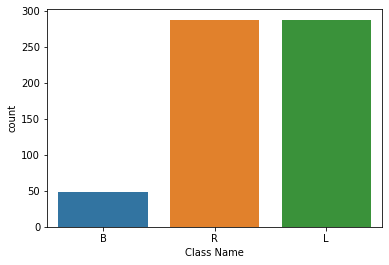

In [8]:
sns.countplot(df['Class Name'])

We see here that most of the times either the scale is in *left* or *right* state. Very few cases are there in which the scale is *balanced.*

We'll separate the features and target from our dataset into X and y.

X contains all of the features 

y contains the target

In [9]:
X = df.drop(['Class Name'], axis=1)

In [10]:
y = df['Class Name']

In [11]:
print(X.shape)
print(y.shape)

(625, 4)
(625,)


## Train Test Split

Splitting the data in training set which our model will be trained on, and testing set that our model will be tested on by making predictions.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [14]:
print(X_train.shape)
print(X_test.shape)

(375, 4)
(250, 4)


## Building and Training our Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

### *gini* index as criterion

In [16]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')

In [17]:
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation

In [18]:
giniPred = giniDecisionTree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.744


In [21]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        24
           L       0.84      0.81      0.83       107
           R       0.82      0.83      0.83       119

    accuracy                           0.74       250
   macro avg       0.56      0.55      0.55       250
weighted avg       0.75      0.74      0.75       250



### *entropy* as criterion

In [22]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')

In [23]:
entropyDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Predictions and Evaluation

In [ ]:
entropyPred = entropyDecisionTree.predict(X_test)

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.748


In [ ]:
print(classification_report(y_test, entropyPred))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00        24
          L       0.84      0.82      0.83       107
          R       0.85      0.83      0.84       119

avg / total       0.76      0.75      0.76       250



## Using ensemble models

# RandomForest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

### *gini* index as criterion

In [25]:
giniForest = RandomForestClassifier(criterion='gini')

In [26]:
giniForest.fit(X_train, y_train)

RandomForestClassifier()

### Predictions and Evaluation

In [27]:
giniForestPred = giniForest.predict(X_test)

In [28]:
print('Accuracy Score: ',accuracy_score(y_test, giniForestPred))

Accuracy Score:  0.812


In [29]:
print(classification_report(y_test, giniForestPred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        24
           L       0.83      0.89      0.86       107
           R       0.89      0.91      0.90       119

    accuracy                           0.81       250
   macro avg       0.57      0.60      0.58       250
weighted avg       0.77      0.81      0.79       250



### *entropy* as criterion

In [30]:
entropyForest = RandomForestClassifier(criterion='entropy')

In [31]:
entropyForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

### Predictions and Evaluation

In [32]:
entropyForestPred = entropyForest.predict(X_test)

In [33]:
print('Accuracy Score: ',accuracy_score(y_test, entropyForestPred))

Accuracy Score:  0.808


In [34]:
print(classification_report(y_test, entropyForestPred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        24
           L       0.81      0.89      0.85       107
           R       0.90      0.90      0.90       119

    accuracy                           0.81       250
   macro avg       0.57      0.60      0.58       250
weighted avg       0.78      0.81      0.79       250



# ExtraTree Classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

### *gini* index as criterion

In [36]:
giniExtra = ExtraTreesClassifier(criterion='gini')

In [37]:
giniExtra.fit(X_train, y_train)

ExtraTreesClassifier()

### Predictions and Evaluation

In [38]:
giniExtraPred = giniExtra.predict(X_test)

In [39]:
print('Accuracy Score: ',accuracy_score(y_test, giniExtraPred))

Accuracy Score:  0.832


In [40]:
print(classification_report(y_test, giniExtraPred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        24
           L       0.85      0.92      0.88       107
           R       0.90      0.92      0.91       119

    accuracy                           0.83       250
   macro avg       0.58      0.61      0.60       250
weighted avg       0.79      0.83      0.81       250



### *entropy* as criterion

In [41]:
entropyExtra = ExtraTreesClassifier(criterion='entropy')

In [42]:
entropyExtra.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy')

### Predictions and Evaluation

In [43]:
entropyExtraPred = entropyExtra.predict(X_test)

In [44]:
print('Accuracy Score: ',accuracy_score(y_test, entropyExtraPred))

Accuracy Score:  0.816


In [45]:
print(classification_report(y_test, entropyExtraPred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        24
           L       0.85      0.88      0.87       107
           R       0.87      0.92      0.89       119

    accuracy                           0.82       250
   macro avg       0.57      0.60      0.59       250
weighted avg       0.78      0.82      0.80       250

